In [140]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [141]:
dictionary = {}

In [182]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [183]:
import networkx as nx

In [184]:
%matplotlib inline

In [185]:
graph = connection

In [186]:
g = nx.Graph(graph)

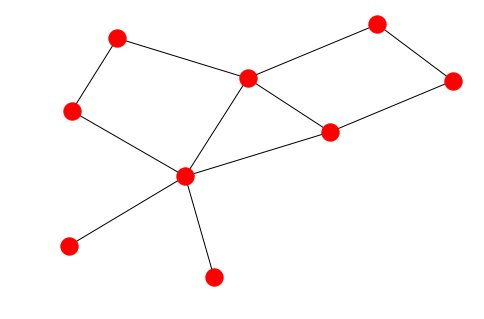

In [187]:
nx.draw(g)

In [188]:
def navigator(start, destination, connection_graph):

    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
        
        successors = connection_graph[froniter]
        
        for s in successors:
            if s ==destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])
                
        pathes = sorted(pathes, key=len)
        
        seen.add(froniter)
        
        
        
        

In [189]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start]
    seen =set()
    
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen: continue
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
        
        seen.add(froniter)


In [190]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

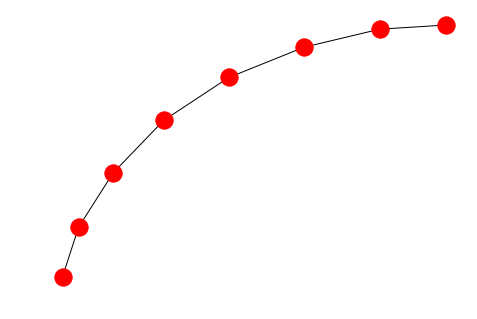

In [191]:
nx.draw(nx.Graph(connection_2))

In [192]:

nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [193]:
def draw_route(routes):
    print('->'.join(routes))

In [197]:
navigator(CHANGCHUN, BANGKOK, connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [195]:
draw_route(navigator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN->BEIJING->SHENZHEN->BANGKOK


## Sentence Generation

In [198]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [210]:
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [216]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [217]:
import random

In [218]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
            
        target, rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [219]:
g = parse_grammar(grammar)

In [220]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [222]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [223]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [224]:
gene(g)

'这个好看的小猫看见一个小小的篮球'

In [225]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='),target='expression'))

8*2*9/65
4+1/0/8
3+9*8/1
030/0+8*0
5-0*0-2
5+4*0-3
8/4-05*2
9+8-1+7
5+82/2-1
3+0*8+6
2+4/1-3
7-8-7*9
5/6/9+3
8-4+4+1
6-4/7+1
4*31/47-6
2+5-2-1
7/4-3+9
2/4/6+13363
7/2+6+9
